In [1]:
%load_ext autoreload
%autoreload 2

In [2]:


import numpy as np
import pandas as pd
from bib.cleaning import *
from bib.plot import *
from bib.rede import *
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

    

In [13]:
a = np.loadtxt("./C/testdist.txt")
faixas_ = a.T[0]
a = a[:,1:]

In [14]:
graus = np.sum(a,axis = 1)
a = a[graus !=0]
faixas_ = faixas_[graus!= 0]

graus = graus[graus!= 0]
A = []
B = a/(np.sum(a,axis = 1)[:, np.newaxis])

In [17]:
M = np.zeros((5,5))
for i in range(5):
    M[i] = np.mean(B[faixas_ == i],axis=  0)

In [18]:
M

array([[0.26570812, 0.16033808, 0.34899879, 0.18744254, 0.03751247],
       [0.32210209, 0.14938862, 0.32980378, 0.16461493, 0.03409058],
       [0.32206926, 0.15497267, 0.31720403, 0.16939729, 0.03635674],
       [0.32812395, 0.14491287, 0.33886773, 0.16105623, 0.02703922],
       [0.32113794, 0.15544245, 0.34355983, 0.1436821 , 0.03617768]])

In [ ]:
brasil = pd.read_csv("./input/Censo 2022 - Pirâmide etária - Brasil.csv",sep=';')
del brasil['Unnamed: 4']
del brasil['Unnamed: 5']
del brasil['Recorte Geográfico']
brasil['Total'] = brasil['População feminina(pessoas)'] + brasil['População masculina(pessoas)']
brasil

In [ ]:
quartis = [0,20,30,50,70,10000]
brasil['Grupo de idade'] = [int(i.split(" ")[0]) for i in brasil['Grupo de idade']]
brasil

In [ ]:
soma = np.zeros(len(quartis))
for i in brasil[['Grupo de idade','Total']].values[::-1]:
    for j in range(len(quartis)):
        if(i[0]< quartis[j]):
            soma[j] += i[1]
            break

In [ ]:
np.savetxt('./C/dados/pop_brasil.txt',soma[1:]/np.sum(soma),fmt = "%f") 

In [3]:
polymod = pd.read_csv("./input/POLYMOD/2008_Mossong_POLYMOD_contact_common.csv")
polymod_ = pd.read_csv("./input/POLYMOD/2008_Mossong_POLYMOD_hh_common.csv")
polymod_ids = pd.read_csv("./input/POLYMOD/2008_Mossong_POLYMOD_participant_common.csv")

contatos = polymod[['part_id','cont_id','cnt_age_exact','cnt_age_est_min','cnt_age_est_max']]
contatos = contatos.merge(polymod_ids[['part_id','part_age']], on='part_id', how='inner')


/tmp/ipykernel_10530/1874454666.py:1: DtypeWarning: Columns (6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  polymod = pd.read_csv("./input/POLYMOD/2008_Mossong_POLYMOD_contact_common.csv")


In [4]:
df = polymod[['phys_contact','duration_multi']]
df = df.dropna()

In [5]:
df.head()

,phys_contact,duration_multi
0,1.0,4.0
1,1.0,5.0
2,1.0,4.0
3,1.0,5.0
4,1.0,3.0


In [6]:
polymod

,part_id,cont_id,cnt_age_exact,cnt_age_est_min,cnt_age_est_max,cnt_gender,cnt_home,cnt_work,cnt_school,cnt_transport,cnt_leisure,cnt_otherplace,frequency_multi,phys_contact,duration_multi
0,1,101,42.0,42.0,NaN,F,True,False,False,False,False,False,1.0,1.0,4.0
1,1,102,9.0,9.0,NaN,F,False,False,True,False,False,False,1.0,1.0,5.0
2,1,103,42.0,40.0,45.0,F,False,False,False,False,True,False,3.0,1.0,4.0
3,1,104,8.0,8.0,NaN,F,False,False,True,False,False,False,1.0,1.0,5.0
4,1,105,29.0,28.0,30.0,F,False,False,True,False,False,False,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97899,8001,800124,11.0,11.0,NaN,F,True,False,False,False,False,False,1.0,1.0,5.0
97900,8001,800125,3.0,3.0,NaN,M,True,False,False,False,False,False,1.0,1.0,5.0
97901,8001,800126,43.0,43.0,NaN,F,True,False,False,False,False,False,1.0,1.0,5.0
97902,8001,800127,33.0,33.0,NaN,F,False,False,False,False,False,True,4.0,1.0,3.0


In [7]:
merged_df = contatos.dropna(subset=['cnt_age_exact', 'cnt_age_est_min'], how='all')[['part_id','part_age','cnt_age_exact']]
quartis = [0,20,30,50,70,10000]
part = np.unique(merged_df['part_id'])

In [8]:
merged_df = transform_faixa(merged_df,"part_age",quartis)
merged_df = transform_faixa(merged_df,"cnt_age_exact",quartis)
polymod_ids = transform_faixa(polymod_ids,"part_age",quartis)

In [9]:
pivot_df = merged_df.pivot_table(index='part_id', columns='cnt_age_exactFaixas', aggfunc='size', fill_value=0)

In [10]:
faixas = polymod_ids[polymod_ids['part_id'].isin(part)]['part_ageFaixas'].values
contatos = pivot_df.values

In [11]:
contatos

array([[13,  1,  4,  2,  0],
       [ 0,  0,  2,  2,  0],
       [ 0,  2,  6,  7,  0],
       ...,
       [ 3,  0,  2,  2,  0],
       [ 0,  4,  2,  4,  0],
       [14,  2,  9,  3,  0]])

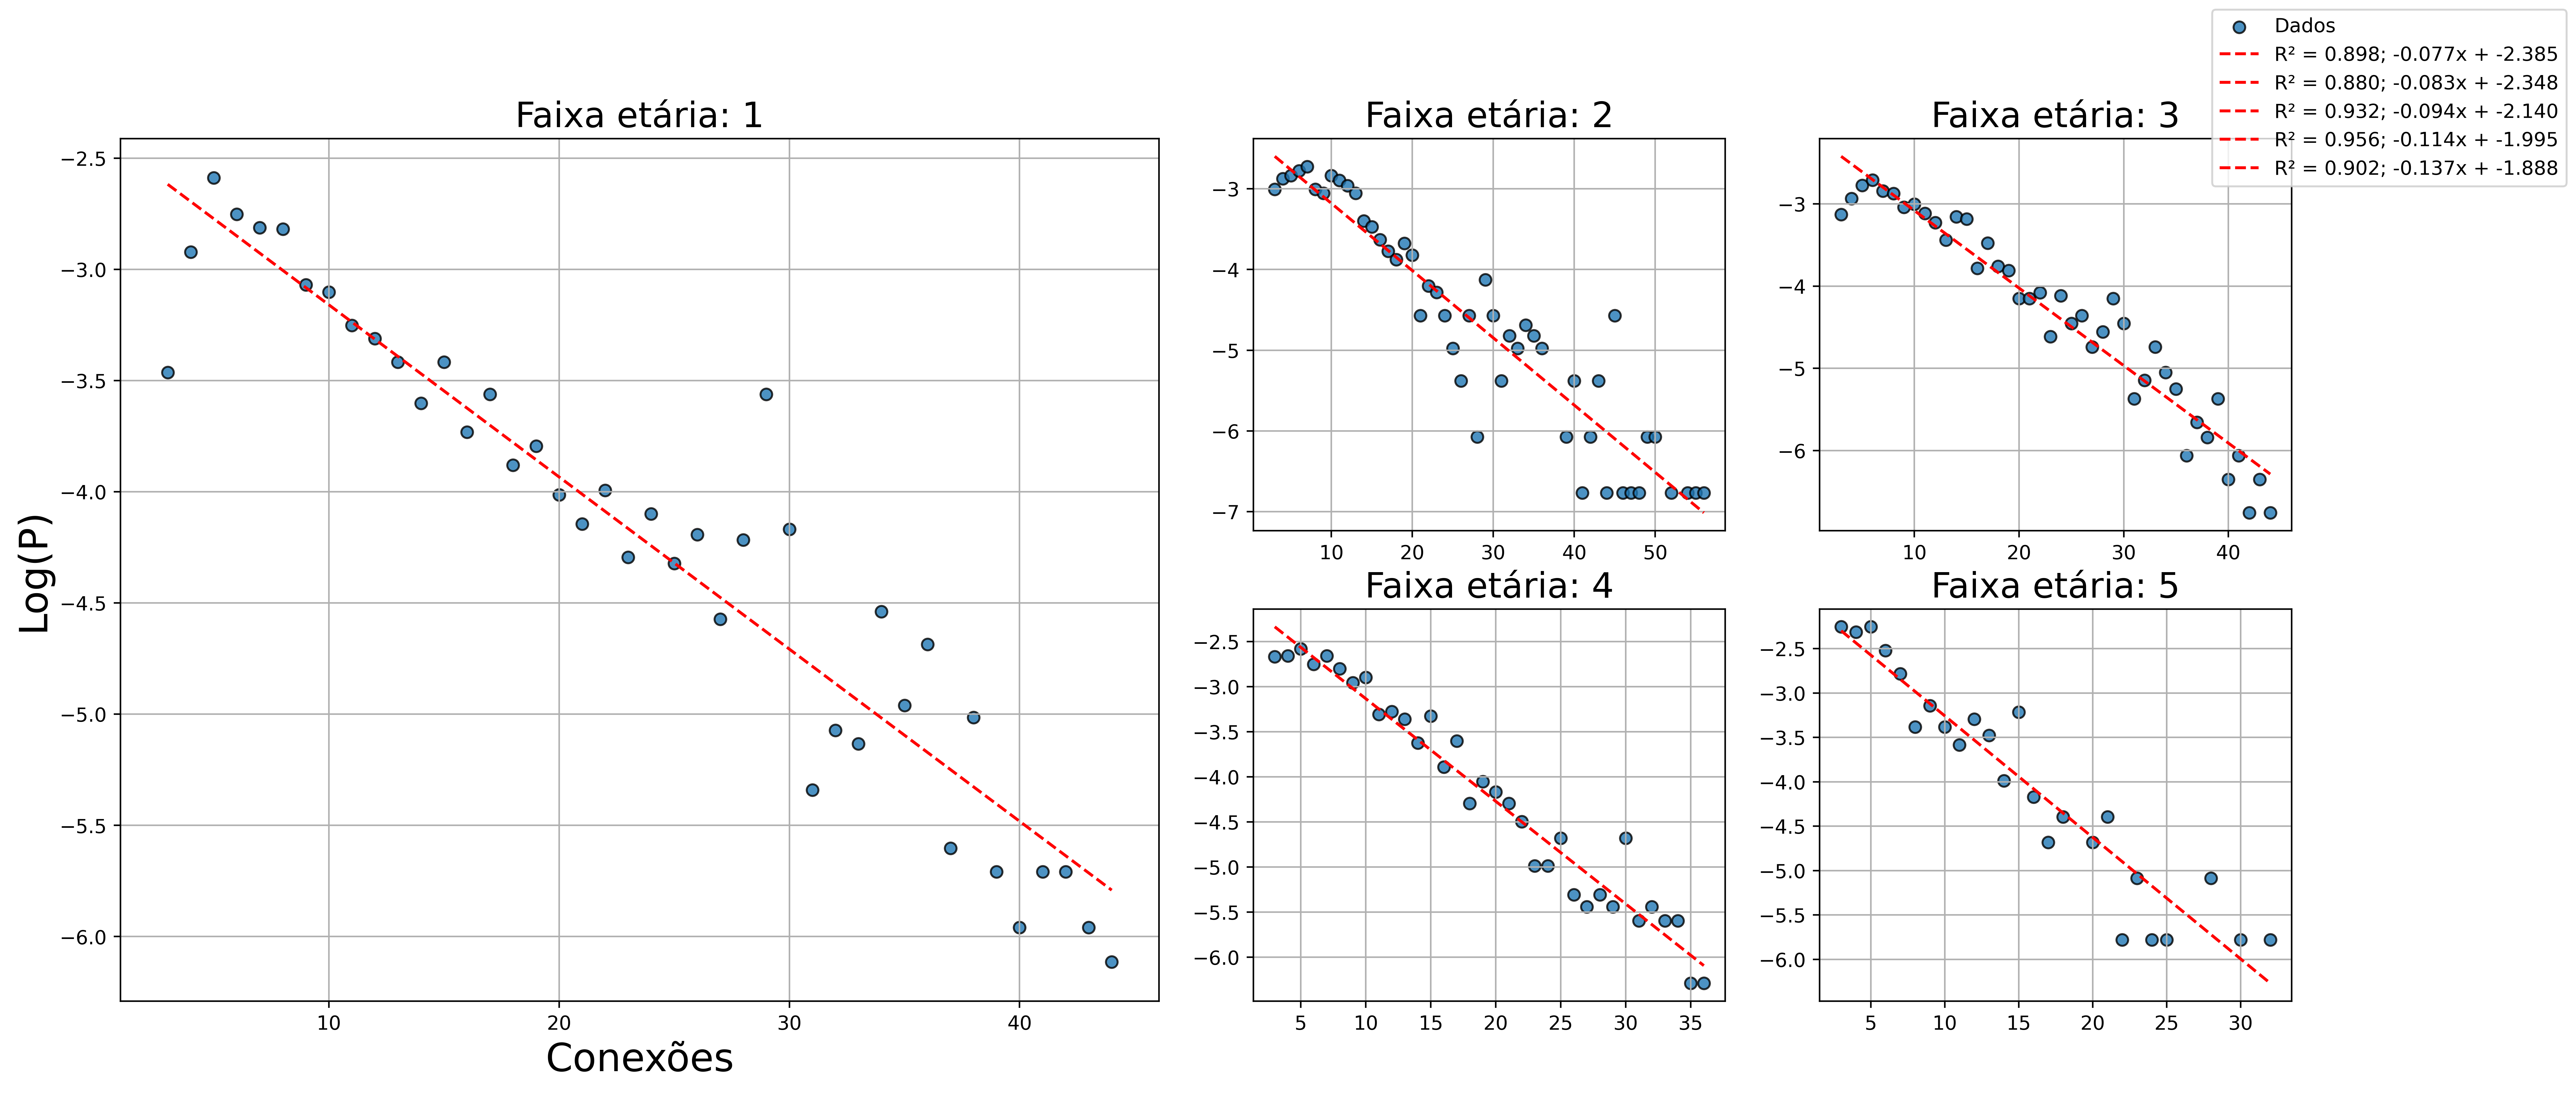

In [54]:
A,B,C,S = generate_distribution_byfaixas(contatos,faixas)

In [18]:
N = np.unique(faixas,return_counts=True)[1]
N = N/np.sum(N)

In [258]:
max = 59
for faixa in range(5):
    x,grau = np.unique(np.sum(contatos[faixas == faixa],axis = 1),return_counts= True)
    grau = grau/np.sum(grau)
    k = np.array([grau[x == i][0] if(len(grau[x == i]) != 0) else 0 for i in np.arange(max+1)])
    zeros = k == 0
    k = np.cumsum(k)
    k[zeros] = -1
    k[np.argmax(k)] = 1
    np.savetxt(f"./C/dados/distribution_{faixa}.txt",k,fmt = "%f")

In [46]:
#dist = np.zeros((5,5))
dist = np.ones((5,5))*0.2

In [47]:
np.savetxt("./C/dados/multi_probability_density.txt",dist,fmt = '%f')

In [281]:
c = np.loadtxt("./C/conexoes.txt")

In [282]:
faixas_ = c.T[0]
unicas = np.unique(faixas_)
c = c[:,1:]

In [283]:
faixa = 0
x,y = np.unique(contatos[faixas == faixa][:,0],return_counts=True)
x_,y_ = np.unique(c[faixas_ == faixa][:,0],return_counts=True)
y = y/np.sum(y)
y_ = y_/np.sum(y_)
fig = go.Figure()

# Adicionar o primeiro gráfico de barras
fig.add_trace(go.Bar(x=x, y=y, name='Dados'))

# Adicionar o segundo gráfico de barras
fig.add_trace(go.Bar(x=x_, y=y_, name='Algoritmo'))

# Atualizar o layout do gráfico
fig.update_layout(title='Dois Gráficos de Barras na Mesma Figura',
                  xaxis_title='Categoria',
                  yaxis_title='Contagem',
                  barmode='group')

# Exibir o gráfico
fig.show()

In [10]:
create_multi_bar(polymod)

In [21]:
df_merged = pd.merge(polymod_ids,polymod, on='part_id')

# Agora, o DataFrame 'df_merged' terá as colunas 'id', 'valor' e 'novo_id'
# Se quiser manter apenas 'novo_id' e 'valor', pode descartar a coluna 'id'
df_merged = df_merged.drop('part_id', axis=1)

In [23]:
polymod_

,hh_id,country,hh_size
0,Mo08HH1,IT,3
1,Mo08HH2,IT,3
2,Mo08HH3,IT,3
3,Mo08HH4,IT,3
4,Mo08HH5,IT,4
...,...,...,...
7285,Mo08HH8000,BE,3
7286,Mo08HH8001,BE,6
7287,Mo08HH50036,BE,1
7288,Mo08HH50037,BE,1


In [17]:
a = get_all_data()
a

,Contato_idade,id,Idade
0,24.0,Belgica2006_0,22.0
1,22.0,Belgica2006_0,22.0
2,22.0,Belgica2006_0,22.0
3,48.0,Belgica2006_0,22.0
4,25.0,Belgica2006_0,22.0
...,...,...,...
215650,9.0,Zimbabwe_1244,7.0
215651,9.0,Zimbabwe_1244,7.0
215652,53.0,Zimbabwe_1244,7.0
215653,29.0,Zimbabwe_1244,7.0


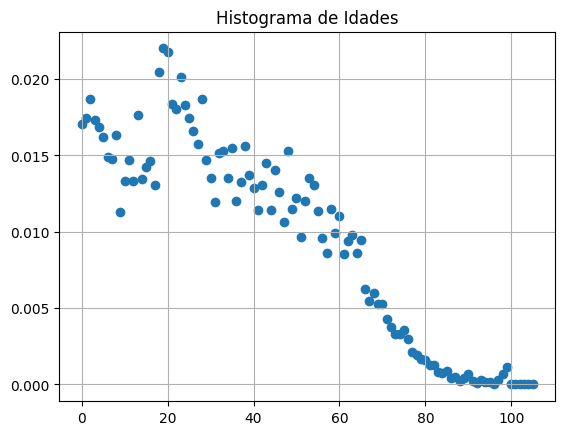

In [5]:
plot_idades(a)

In [4]:
quartis = [0,20,30,50,70,10000]

In [41]:
a = transform_faixa(a,"Idade",quartis)
a = transform_faixa(a,"Contato_idade",quartis)

In [42]:
polymod = [i for i in a['id'].unique() if('POLYMOD' in i)]
polymod = a[a['id'].isin(polymod)]

In [47]:
polymod

,Contato_idade,id,Idade,IdadeFaixas,Contato_idadeFaixas
58662,42.0,POLYMOD_0,8.0,0,2
58663,9.0,POLYMOD_0,8.0,0,0
58664,42.0,POLYMOD_0,8.0,0,2
58665,8.0,POLYMOD_0,8.0,0,0
58666,29.0,POLYMOD_0,8.0,0,1
...,...,...,...,...,...
156561,11.0,POLYMOD_7286,14.0,0,0
156562,3.0,POLYMOD_7286,14.0,0,0
156563,43.0,POLYMOD_7286,14.0,0,2
156564,33.0,POLYMOD_7286,14.0,0,2


In [48]:
contagem = pd.crosstab(polymod['id'], polymod['Contato_idadeFaixas']).values
faixas = polymod.drop_duplicates(subset='id')['IdadeFaixas'].values

In [49]:
contagem.shape

(7189, 5)

In [75]:
x,y = np.unique(np.sum(contagem,axis = 1)[faixas == 0],return_counts=True)
print(y)
y = y/np.sum(y)
l = np.mean(np.sum(contagem,axis = 1)[faixas == 0])

[ 62  82 124 167 214 174 166 154 120 145 123 110  94  85  95  73  78  55
  57  43  41  37  30  28  22  17  23  19  70  31   9  16  17  16  10  13
   2   6   8   7   4   6   5   3  43   2   1   1   1   1   1   4   1]


In [60]:
def LR(x,y):
    reg = LinearRegression()
    reg.fit(x.reshape(-1,1),y)
    R2 = r2_score(reg.predict(x.reshape(-1,1)),y)
    return R2,reg.coef_[0]

In [40]:
np.sum(contagem[faixas == 4],axis = 1)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 7189 but corresponding boolean dimension is 7238

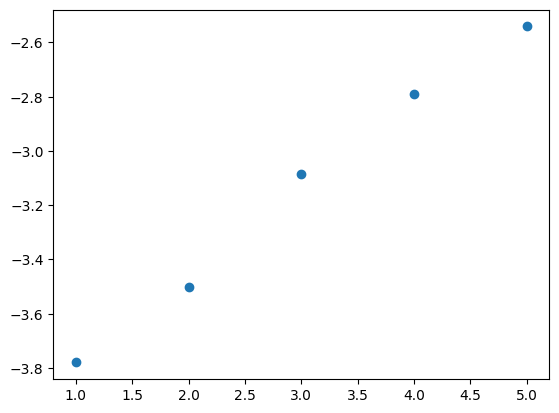

In [49]:
#plt.bar(x,[np.exp(-l)*l**i/np.math.factorial(i) for i in x])

In [188]:
modelo_k = np.loadtxt("./C/output/modelo/k_idades_0.50.txt").astype(int)

In [254]:
c = np.loadtxt("./C/conexoes3.txt")

In [224]:
np.sum(contatos,axis = 1)[np.sum(contatos,axis = 1) == 0]

array([], dtype=int64)

In [255]:
compara(c,contatos,faixas)

As amostras provavelmente vêm da mesma distribuição 1.0.
As amostras provavelmente vêm da mesma distribuição 1.0.
As amostras provavelmente vêm da mesma distribuição 1.0.
As amostras provavelmente vêm da mesma distribuição 1.0.
As amostras provavelmente vêm da mesma distribuição 1.0.


In [40]:
matrix_k = np.loadtxt("./C/matrix_k.txt").astype(int)
result = []
for i in range(5):
    M = matrix_k[matrix_k.T[0] == i][:,1:]
    kzinho = np.sum(M,axis = 1)

    M = M /  kzinho[:, np.newaxis]
    result.append(np.mean(M,axis=0))

In [8]:
print(f"Grau médio: {np.mean(np.sum(contagem,axis = 1))}")
for f in range(5):
    print(f"Grau médio da faixa etária {f+1}: {np.mean(np.sum(contagem[faixas == f],axis = 1))}")

Grau médio: 13.531506468215328
Grau médio da faixa etária 1: 13.002945508100147
Grau médio da faixa etária 2: 14.098737083811711
Grau médio da faixa etária 3: 13.462165308498253
Grau médio da faixa etária 4: 14.026576019777503
Grau médio da faixa etária 5: 14.507518796992482


In [32]:
resultado = np.loadtxt("./C/test.txt")
faixas_ = np.loadtxt("./C/test2.txt")

In [13]:
contagem = pd.crosstab(a['id'], a['Contato_idadeFaixas']).values
faixas = a.drop_duplicates(subset='id')['IdadeFaixas'].values

In [144]:
data = pd.read_csv('./output/participantes.csv')
contatos01 = pd.read_csv('./output/contatos_01.csv')

In [40]:
vetor[vetor != np.arange(len(vetor))[np.sum(vetor,axis = 1) == 0]]

/tmp/ipykernel_19787/3761567207.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  vetor[vetor != np.arange(len(vetor))[np.sum(vetor,axis = 1) == 0]]


array([[[18.,  8., 23.,  7.,  2.],
        [21.,  7., 20.,  8.,  2.],
        [12., 12., 22.,  7.,  2.],
        ...,
        [ 6.,  0.,  1.,  0.,  0.],
        [11.,  0.,  2.,  0.,  0.],
        [ 2.,  0.,  0.,  0.,  0.]]])

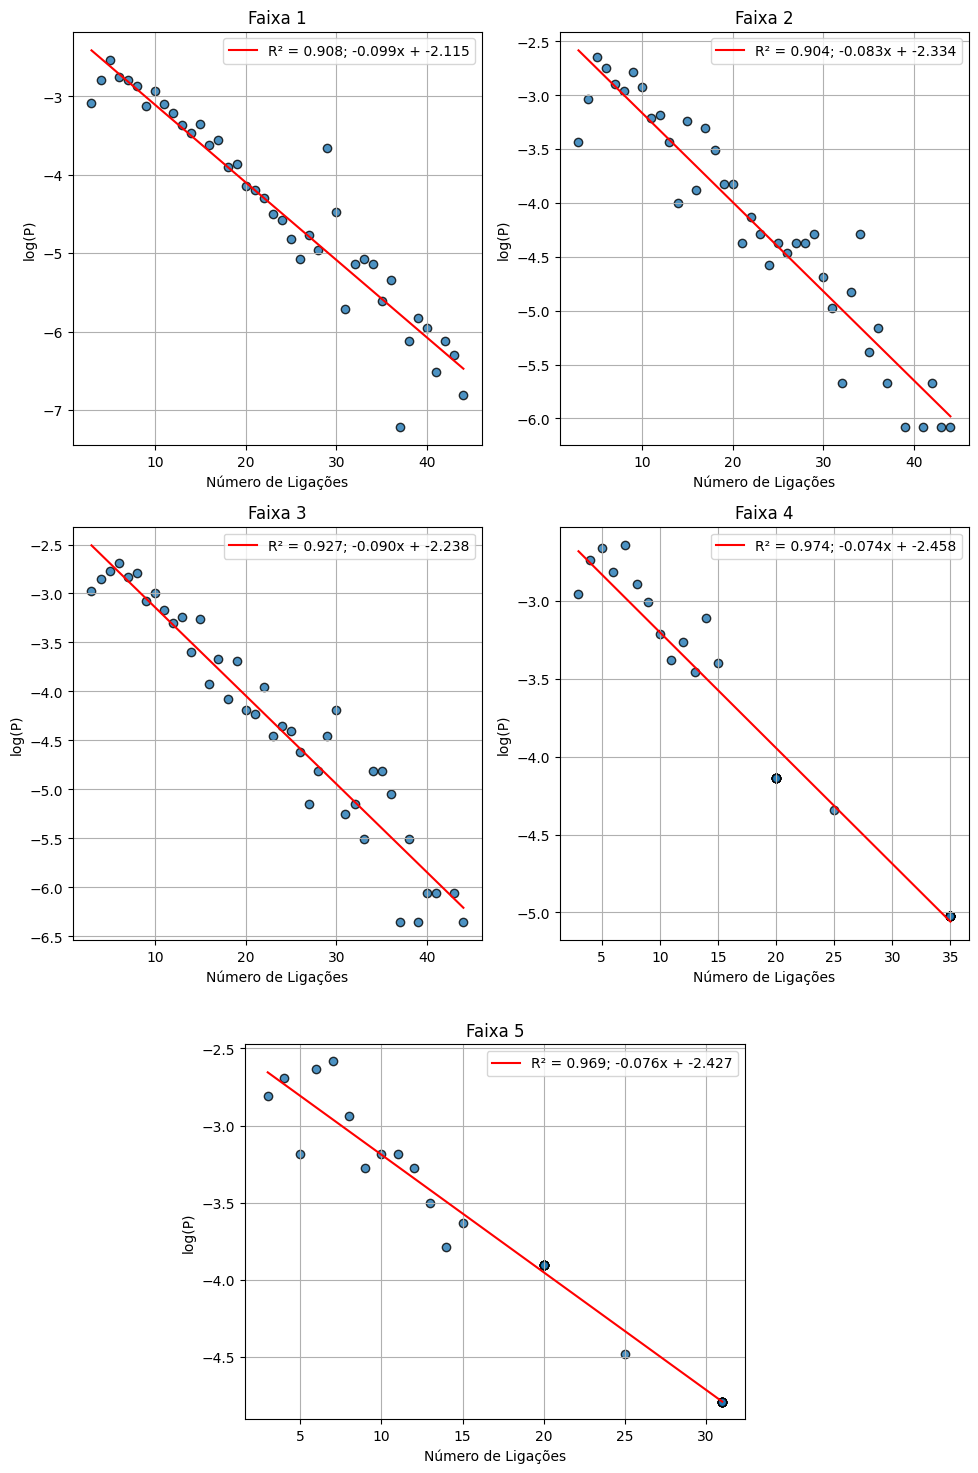

In [8]:
A,B,C,S = generate_distribution_byfaixas(contagem,faixas)

In [35]:
heat_map(B,'h')

In [16]:
matrix_k = np.loadtxt("./C/output/modelo/matrix_0.00.txt").astype(int)
result = []
for i in range(5):
    M = matrix_k[matrix_k.T[0] == i][:,1:]
    kzinho = np.sum(M,axis = 1)

    M = M /  kzinho[:, np.newaxis]
    result.append(np.mean(M,axis=0))
result = np.array(result)
result = result - B
heat_map(result,np.array(range(1,6)),np.array(range(1,6)),'modelo')

In [29]:
fig = go.Figure()
x,y = np.unique(polymod['IdadeFaixas'],return_counts=True)
y = y/np.sum(y)
fig.add_trace(go.Bar(
    x=[f"Faixa {i+1}" for i in x],
    y=y,
    text=np.round(y,2),  # Texto exibido no hover
    textposition='outside',  # Posição do texto (pode ser 'inside', 'outside', 'auto', 'none')
    marker=dict(line=dict(color='black', width=1),color = px.colors.qualitative.Prism[1])
))
# Adicione título e rótulos aos eixos
fig.update_layout(
    width = 800,
    height = 600,
    yaxis=dict(title='Frequência', tickfont=dict(size=15)),
    xaxis=dict(title='Valores', tickfont=dict(size=15)),
    font=dict(
        #family="Courier New, monospace",
        size=15,
        #color="RebeccaPurple"
    ),
    template = 'seaborn',
    paper_bgcolor='rgba(0,0,0,0)', 
)
s = 20
fig.update_layout(margin=dict(l=s, r=s, t=s, b=s))

# Exiba o gráfico
fig.show()
fig.write_image("./img/faixas_polymod.png")

In [38]:
polymod

,Contato_idade,id,Idade,IdadeFaixas,Contato_idadeFaixas
58662,42.0,POLYMOD_0,8.0,0,2
58663,9.0,POLYMOD_0,8.0,0,0
58664,42.0,POLYMOD_0,8.0,0,2
58665,8.0,POLYMOD_0,8.0,0,0
58666,29.0,POLYMOD_0,8.0,0,1
...,...,...,...,...,...
156561,11.0,POLYMOD_7286,14.0,0,0
156562,3.0,POLYMOD_7286,14.0,0,0
156563,43.0,POLYMOD_7286,14.0,0,2
156564,33.0,POLYMOD_7286,14.0,0,2


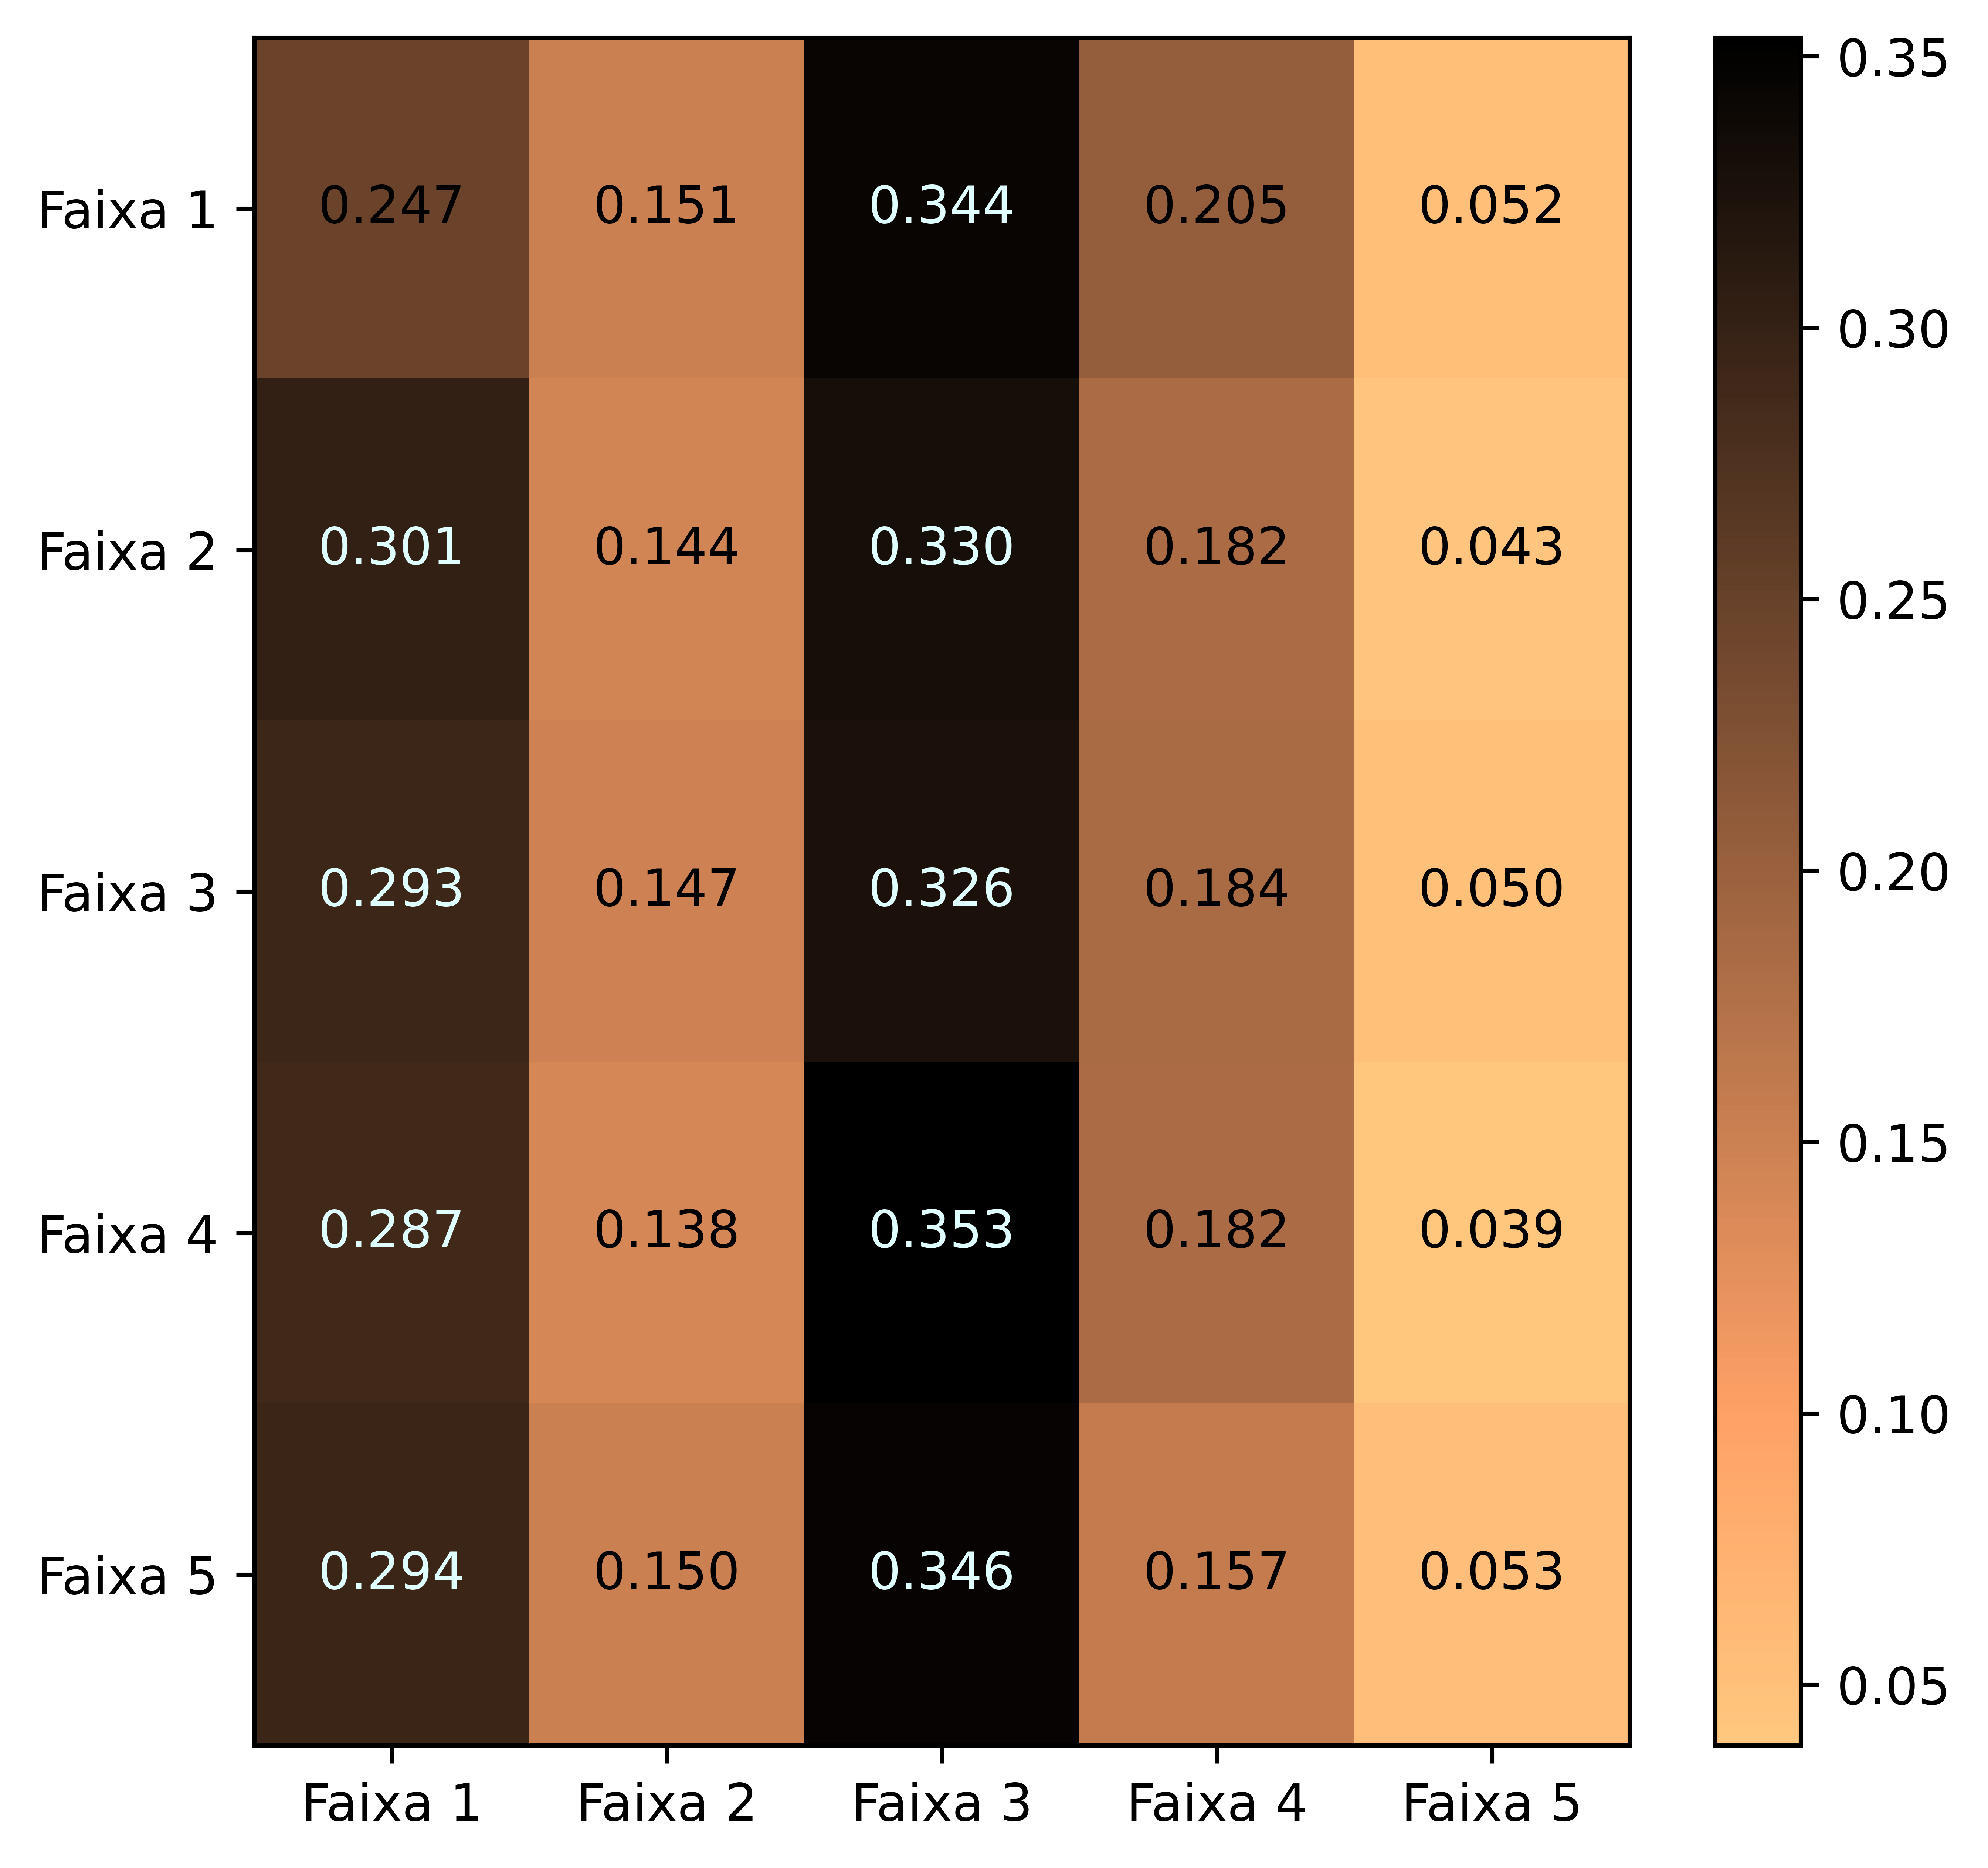

In [69]:
B = np.array(B)
plt.figure(figsize=(6,6),dpi = 1000)
plt.imshow(B, cmap='copper_r', aspect='auto')
for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        plt.annotate(f'{B[i, j]:.3f}', xy=(j, i), ha='center', va='center', color='lightcyan' if(B[i, j] > 0.25) else "black")
# Configurações do heatmap
x_labels = [f"Faixa {i+1}"for i in range(5)]
y_labels = [f"Faixa {i+1}"for i in range(5)]
plt.xticks(np.arange(B.shape[1]), x_labels)
plt.yticks(np.arange(B.shape[0]), y_labels)
plt.colorbar()  # Barra de cores indicando os valores
#plt.title('Heatmap Example')
plt.savefig("./img/heat.png")
# Exibir o heatmap
plt.show()

In [12]:
vetor = np.loadtxt("./C/test.txt")
faixa_ = np.loadtxt("./C/test2.txt",dtype=int)

In [15]:
print(f"Grau médio dos dados: {np.mean(np.sum(vetor,axis = 1))}")
for i in range(5):
    print(np.sum(contagem[faixas == i].T,axis = 1)/np.sum(np.sum(contagem[faixas == i].T,axis = 1)))

Grau médio dos dados: 13.464059059707292
[0.29771209 0.15052667 0.33562691 0.17518972 0.04094461]
[0.35855049 0.13868078 0.31490228 0.15081433 0.03705212]
[0.37348668 0.13827395 0.30140955 0.15046697 0.03636285]
[0.37149152 0.12941176 0.31777925 0.14611148 0.03520599]
[0.38118684 0.13708215 0.30707437 0.13397253 0.04068412]


In [50]:
for i in range(5):
    print(np.sum(vetor[faixa_ == i].T,axis = 1)/np.sum(np.sum(vetor[faixa_ == i].T,axis = 1)))

[0.25003844 0.14827003 0.34224204 0.20805782 0.05139167]
[0.33518737 0.13390809 0.31669332 0.17082667 0.04338455]
[0.33351316 0.13651621 0.30504106 0.18120242 0.04372715]
[0.35495042 0.12891547 0.31722546 0.164017   0.03489165]
[0.36067343 0.13468595 0.31491474 0.14353551 0.04619037]


In [80]:
np.savetxt("./C/dados/lambda.txt",-np.array(A),fmt = "%f")
np.savetxt("./C/dados/multi_probability.txt",np.array(B),fmt = "%f")
np.savetxt("./C/dados/multi_constant.txt",np.exp(np.array(C)),fmt = "%f")